In [1]:
%pylab inline

import libaarhusxyz
import simpegsimpleem


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Right handed coordinate system. x is forward, y to the right, z down

## Load the data from disk
generated by seperate notebook

In [2]:
xyz = libaarhusxyz.XYZ("outputs/em1dtm_stitched_data.xyz")

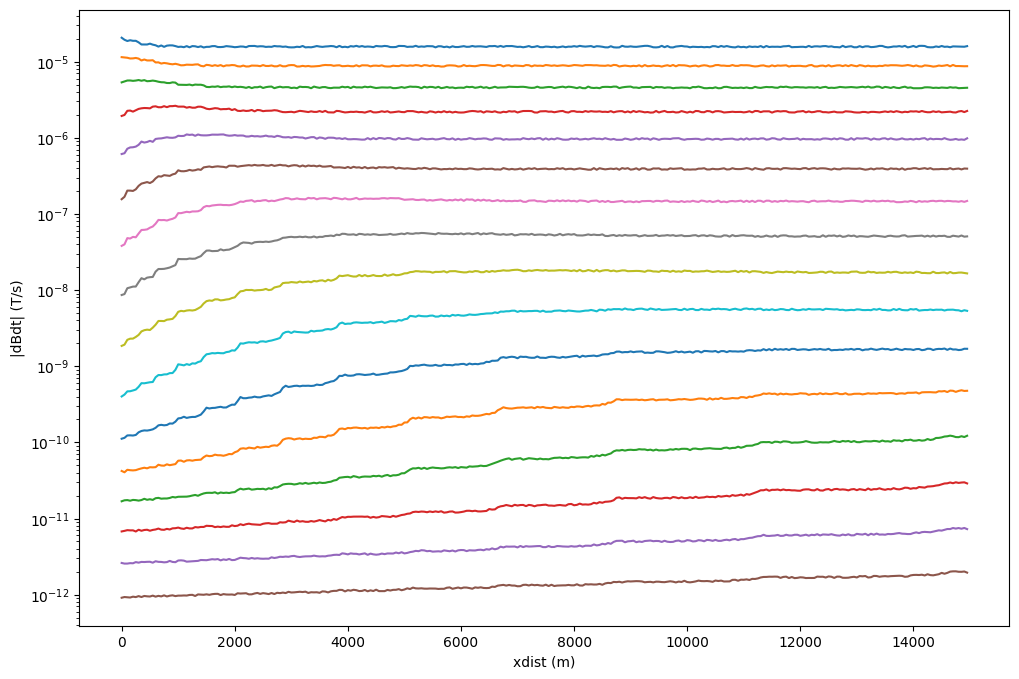

In [3]:
plt.figure(figsize=(12, 8))
xyz.plot_line(0, ax=plt.gca())
plt.show()

# Define the instrument

In [4]:
class MySystem(simpegsimpleem.SingleRecvTEMXYZSystem):
    area=340
    i_max=1
    

## Do the inversion

In [5]:
inv = MySystem(xyz)
try:
    xyzsparse, xyzl2 = inv.invert()
except Exception as e:
    print(e)
    import sys, pdb
    sys.last_traceback = sys.exc_info()[2]
    pdb.pm()

>> Use multiprocessing for parallelization
>> n_cpu: 3


/home/redhog/Projects/Emerald/paper-raw-em-interpretation/env/lib/python3.8/site-packages/discretize/base/base_tensor_mesh.py:1025: FutureWarning: hx has been deprecated, please access as mesh.h[0]
  warnings.warn(
/home/redhog/Projects/Emerald/paper-raw-em-interpretation/env/lib/python3.8/site-packages/discretize/utils/code_utils.py:182: FutureWarning: TensorMesh._cellGradStencil has been deprecated, please use TensorMesh.stencil_cell_gradient. It will be removed in version 1.0.0 of discretize.
  warnings.warn(message, Warning)


model has any nan: 0
============================ Inexact Gauss Newton ============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  8.16e+00  3.41e+05  0.00e+00  3.41e+05    6.86e+03      0              
   1  4.08e+00  5.82e+04  6.94e+02  6.11e+04    4.28e+03      1              
   2  2.04e+00  2.23e+04  1.82e+03  2.60e+04    5.08e+03      0   Skip BFGS  
   3  1.02e+00  5.64e+03  2.11e+03  7.79e+03    1.01e+03      0              
Reached starting chifact with l2-norm regularization: Start IRLS steps...
eps_p: 1.637507096897878 eps_q: 1.637507096897878
>> Fix Jmatrix
   4  5.10e-01  2.36e+03  3.29e+03  4.04e+03    4.52e+02      0   Skip BFGS  
>> Fix Jmatrix
   5  1.01e+00  1.23e+03  4.31e+03  5.57e+03    4.75e+02      0   Skip BFGS  
>> Fix Jmatrix
   6  1.76e+00  1.61e+03  3.41e+03  7.62e+03    3.22e+02      0              
>> Fix Jmat

# Plot the results

In [6]:
import importlib
importlib.reload(libaarhusxyz.xyz)
importlib.reload(libaarhusxyz)
importlib.reload(simpegsimpleem)

<module 'simpegsimpleem' from '/home/redhog/Projects/Emerald/experimental-simpeg-ext/simpegsimpleem/__init__.py'>

(-200.0, 0.0)

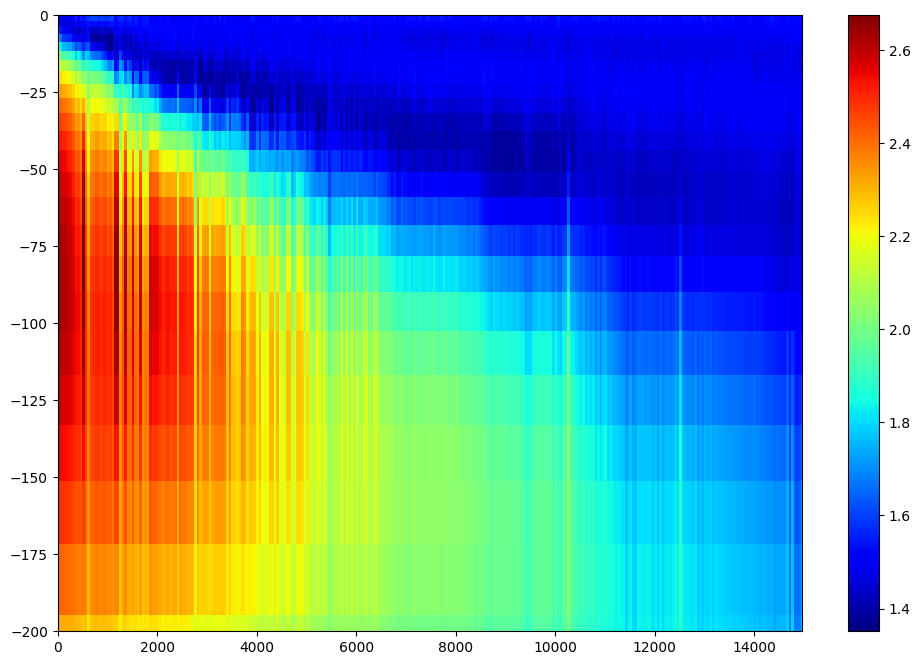

In [7]:
fig = plt.figure(figsize=(12, 8))
ax=plt.gca()
xyzsparse.plot_line(0, ax=ax, cmap="jet")
fig.colorbar(mappable=ax.collections[0])
ax.set_ylim(-200, 0)

(-200.0, 0.0)

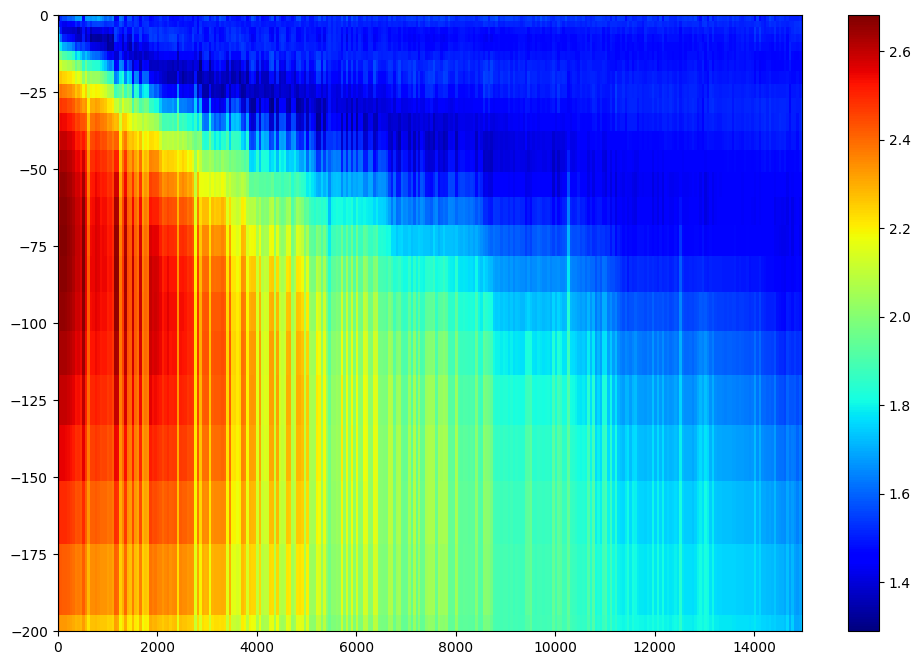

In [8]:
fig = plt.figure(figsize=(12, 8))
ax=plt.gca()
xyzl2.plot_line(0, ax=ax, cmap="jet")
fig.colorbar(mappable=ax.collections[0])
ax.set_ylim(-200, 0)

In [9]:
xyzl2fwd = MySystem(xyzl2, times=inv.times).forward()
xyzsparsefwd = MySystem(xyzsparse, times=inv.times).forward()

>> Use multiprocessing for parallelization
>> n_cpu: 3
>> Use multiprocessing for parallelization
>> n_cpu: 3


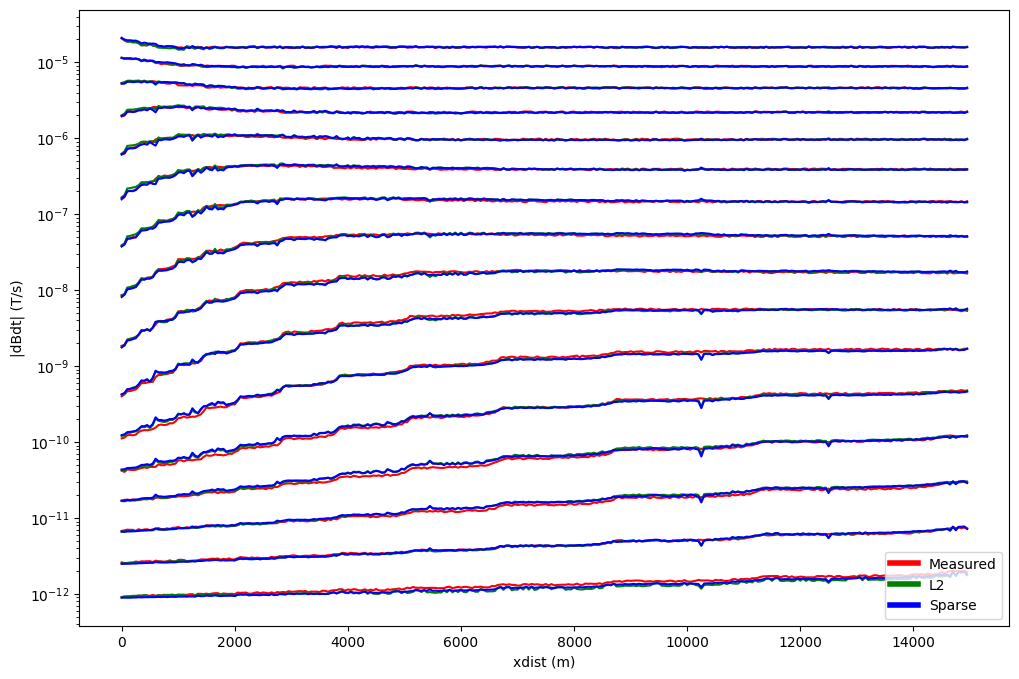

In [10]:
fig = plt.figure(figsize=(12, 8))
ax=plt.gca()
xyz.plot_line(0, ax=ax, c="red", label="measured %(gate)i @ %(time).2e")
xyzl2fwd.plot_line(0, ax=ax, c="green", label="fwd %(gate)i @ %(time).2e")
xyzsparsefwd.plot_line(0, ax=ax, c="blue", label="fwd %(gate)i @ %(time).2e")
ax.legend([matplotlib.lines.Line2D([0], [0], color="red", lw=4),
           matplotlib.lines.Line2D([0], [0], color="green", lw=4),
           matplotlib.lines.Line2D([0], [0], color="blue", lw=4)],
          ['Measured', 'L2', "Sparse"])
plt.show()